In [24]:
# Allows charts to appear in the notebook
%matplotlib inline

# Libraries for analysis
import pandas as pd
import numpy as np
from sklearn import svm

#Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [25]:
# Read in muffin and cupcake ingredient data

recipes=pd.read_csv('C:/Users/user/Downloads/Muffin.csv')
recipes
#recipes.head()

,Type,Flour,Milk,Sugar,Butter,egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,50,25,12,6,5,2,1,0
4,Muffin,55,27,3,7,5,2,1,0
5,Muffin,54,27,7,5,5,2,0,0
6,Muffin,47,26,10,10,4,1,0,0
7,Muffin,50,17,17,8,6,1,0,0
8,Muffin,50,17,17,11,4,1,0,0
9,Cupcake,39,0,26,19,14,1,1,0


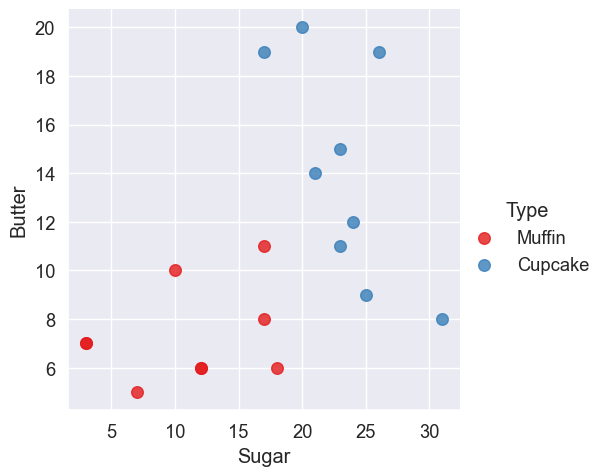

In [26]:
# Plot two ingredients
# Create scatterplot of dataframe

sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [27]:
# Specify inputs for the model

# sugar_butter=recipes[['Sugar','Butter']].as_matrix() 舊版
sugar_butter=recipes[['Sugar','Butter']].to_numpy()
type_label=np.where(recipes['Type']=='Muffin', 0, 1)

In [28]:
# Fit the SVM model

model=svm.SVC(kernel='linear', C=2**-5)

In [29]:
# Fit the SVM model

model=svm.SVC(kernel='linear', C=2**5)

In [30]:
# Fit the SVM model

model=svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(sugar_butter, type_label)

SVC(kernel='linear')

In [31]:
model.fit(sugar_butter, type_label)

SVC(kernel='linear')

In [32]:
# Get the separating hyperpane

w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(5,30)
yy=a*xx-(model.intercept_[0]/w[1])

In [33]:
# Plot the parallels to the separating hyperplane
# that pass through the support vectors

b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

In [34]:
# Get the separating hyperpane

w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(5,30)
yy=a*xx-(model.intercept_[0]/w[1])

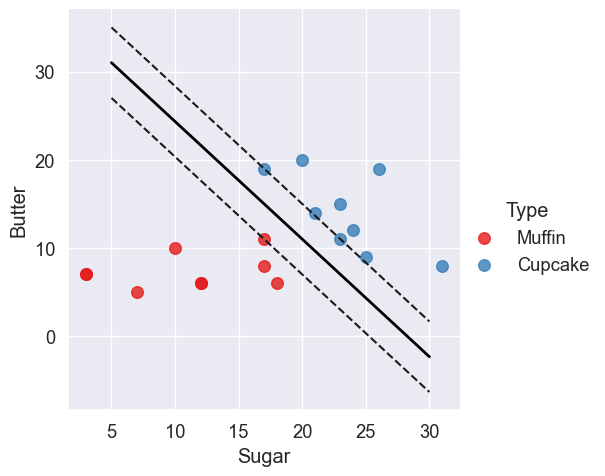

In [37]:
# Look at the margins and support vectors

sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
           s=80, facecolors='none')

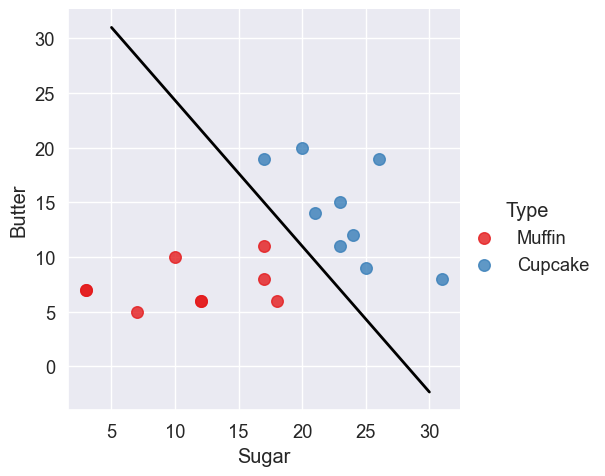

In [41]:
# Plot the hyperplane

sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

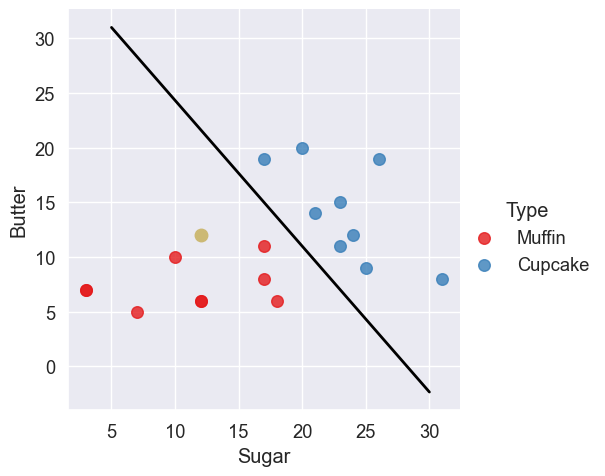

In [43]:
# Plot the point to visually see where the point lies

sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(12,12, 'yo', markersize='9')

In [45]:
# Create a function to guess when a recipe is a muffin 
# or a cupcake using the SVM model we created

def muffin_or_cupcake(butter, sugar):
    if(model.predict([[butter, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [47]:
# Predict if 12 parts butter and sugar

muffin_or_cupcake(12,12)

You're looking at a muffin recipe!


In [ ]:
# Youtube https://www.youtube.com/watch?v=N1vOgolbjSc

In [ ]:
# https://github.com/adashofdata/muffin-cupcake/blob/master/recipes_muffins_cupcakes.csv